In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_completeness_v_measure
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('6-class-csv.csv')
features = df.iloc[:, [i for i in range(df.shape[1]) if i != 4]]
labels = df.iloc[:, 4]

print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Dataset shape: (240, 7)

Column names:
['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class']

First few rows:
   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  


# Hertzsprung-Russell Diagram

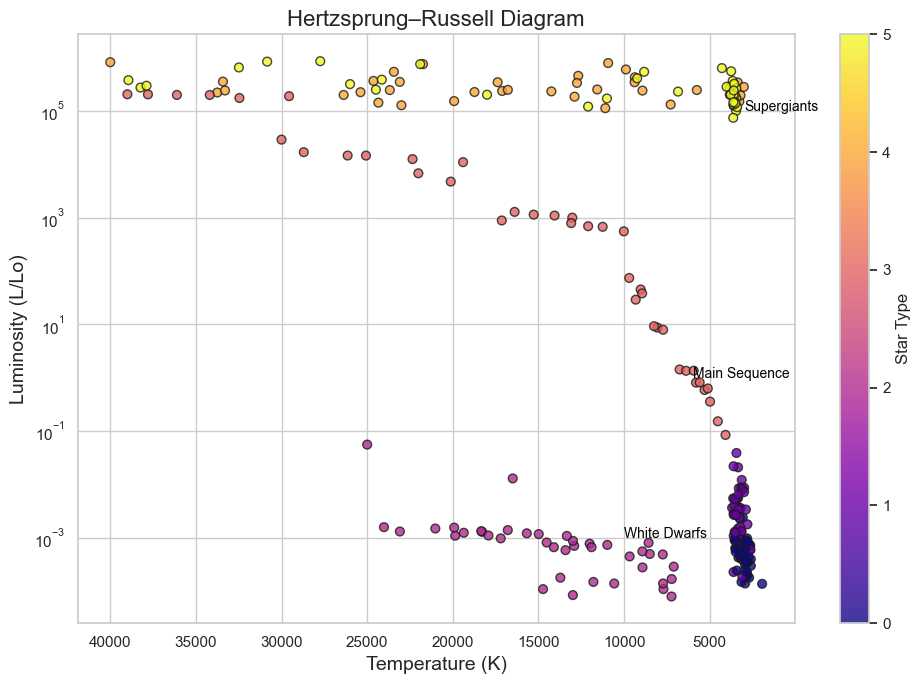

In [21]:
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(10, 7))

scatter = plt.scatter(df["Temperature (K)"], df["Luminosity(L/Lo)"], c=df["Star type"], cmap="plasma", s=40, edgecolors="k", alpha=0.8)

# weird axes settings for HR diagram
plt.gca().invert_xaxis() # reverse because temp decreases
plt.yscale("log") # log scale for luminosity

plt.title("Hertzsprung–Russell Diagram", fontsize=16)
plt.xlabel("Temperature (K)", fontsize=14)
plt.ylabel("Luminosity (L/Lo)", fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label("Star Type")
# add annotations for star types
plt.text(3000, 1e5, "Supergiants", color="black", fontsize=10)
plt.text(6000, 1, "Main Sequence", color="black", fontsize=10)
plt.text(10000, 1e-3, "White Dwarfs", color="black", fontsize=10)

plt.tight_layout()
plt.show()

# Basic Statistics and Exploratory Data Analysis

In [22]:
# Basic Statistics
print("Basic Statistics")
print(df.describe())

Basic Statistics
       Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
count       240.000000        240.000000    240.000000   
mean      10497.462500     107188.361635    237.157781   
std        9552.425037     179432.244940    517.155763   
min        1939.000000          0.000080      0.008400   
25%        3344.250000          0.000865      0.102750   
50%        5776.000000          0.070500      0.762500   
75%       15055.500000     198050.000000     42.750000   
max       40000.000000     849420.000000   1948.500000   

       Absolute magnitude(Mv)   Star type  
count              240.000000  240.000000  
mean                 4.382396    2.500000  
std                 10.532512    1.711394  
min                -11.920000    0.000000  
25%                 -6.232500    1.000000  
50%                  8.313000    2.500000  
75%                 13.697500    4.000000  
max                 20.060000    5.000000  


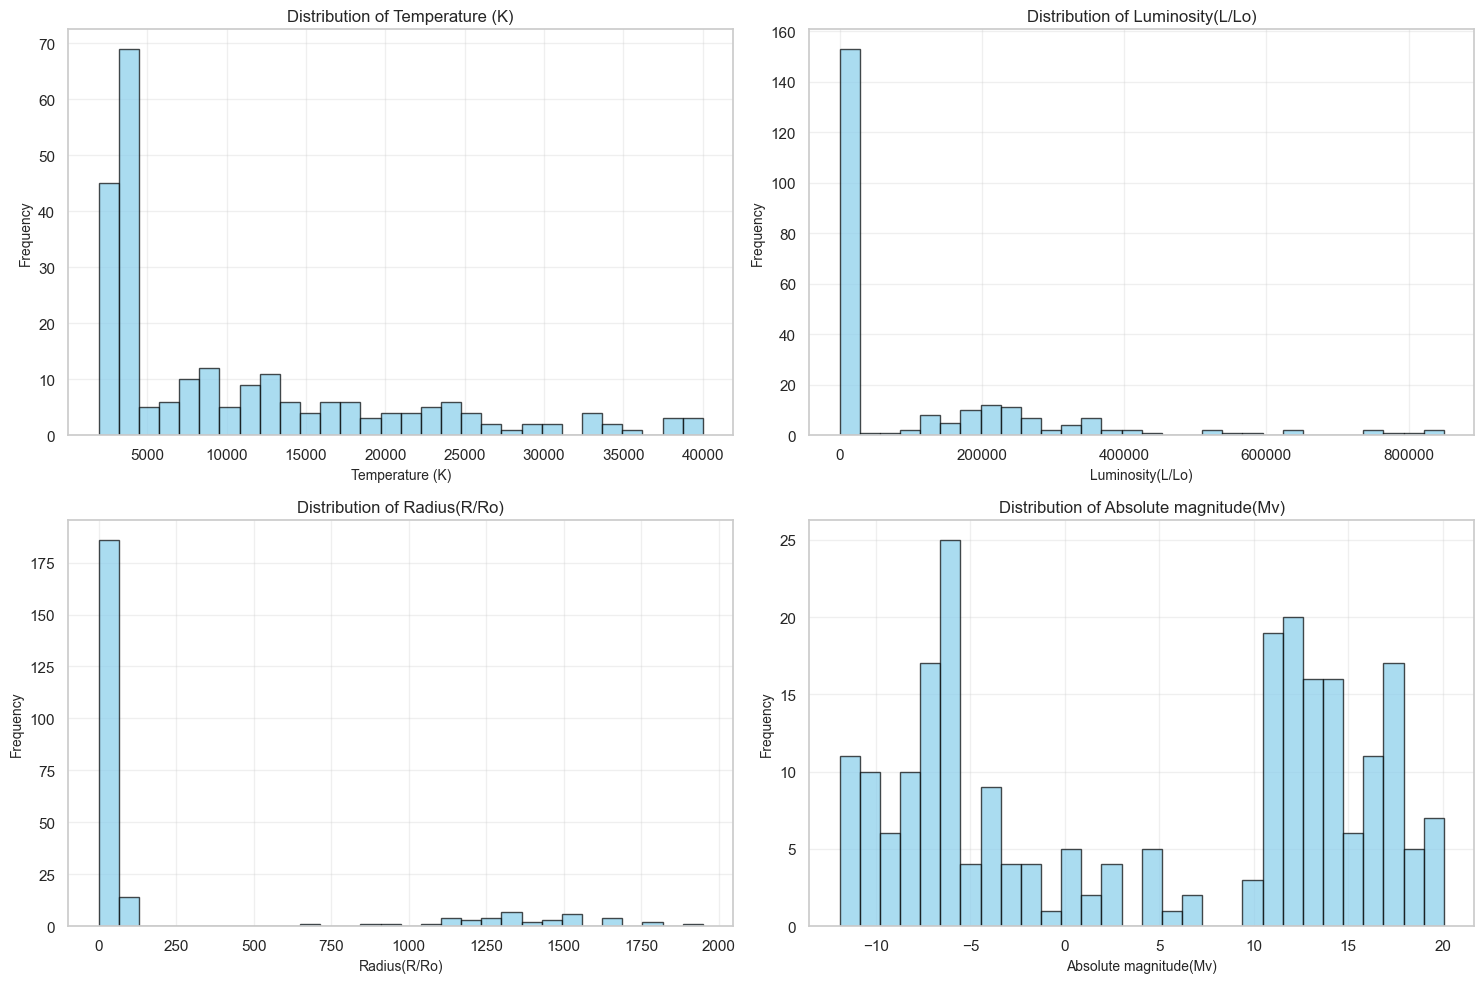

In [23]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Star type' in numeric_cols:
    numeric_cols.remove('Star type')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontsize=12)
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

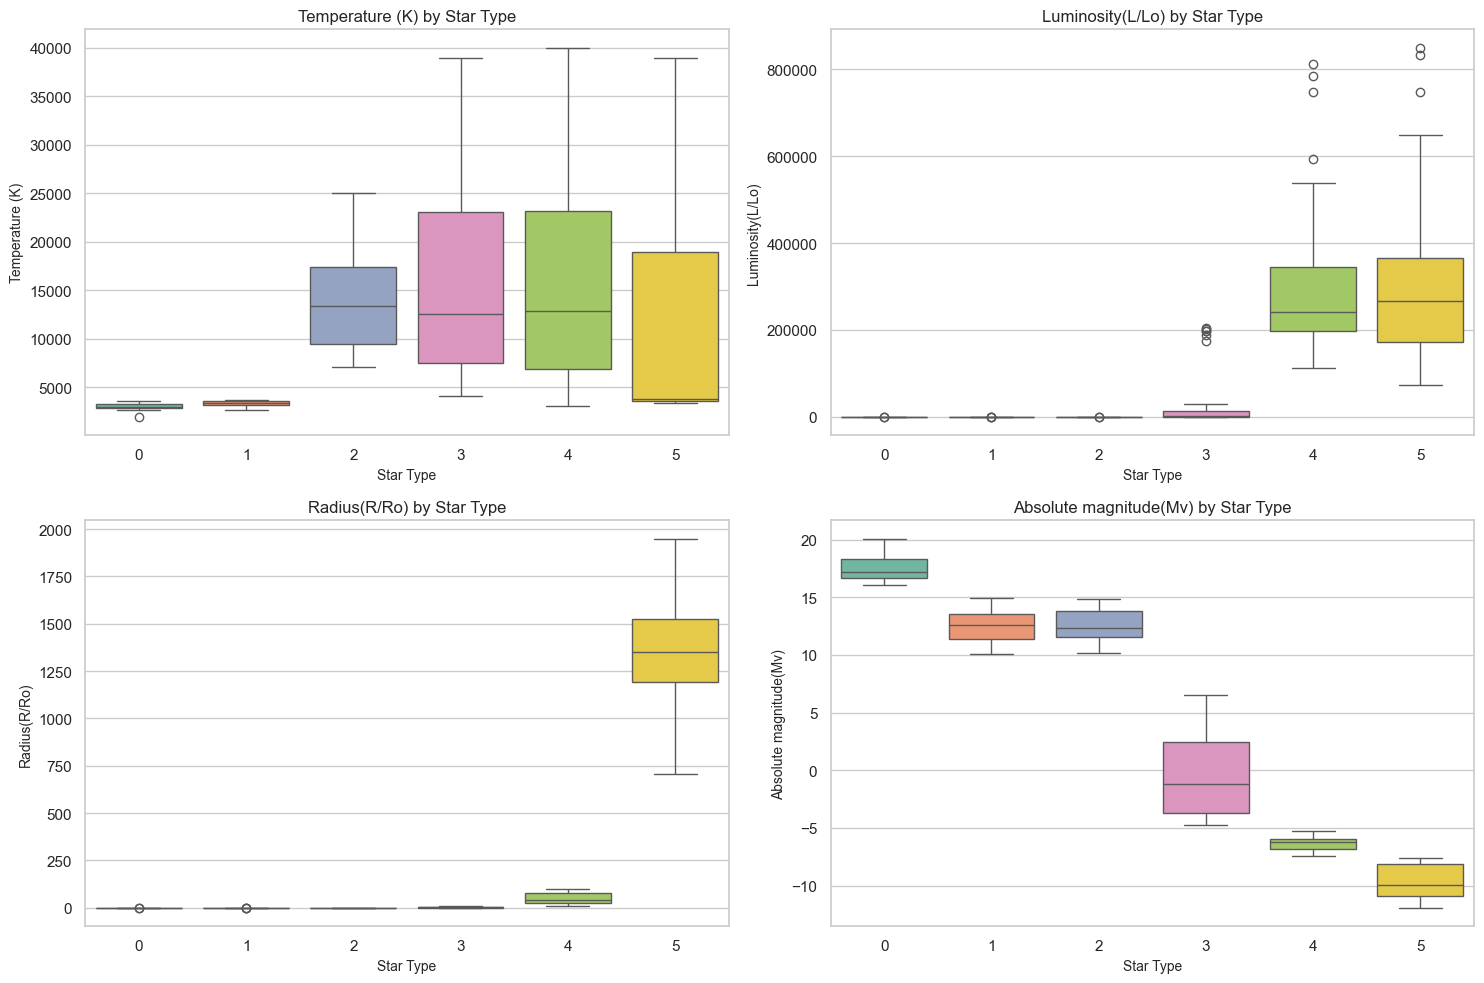

In [24]:
# Box plots for each numeric feature by star type
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        sns.boxplot(data=df, x='Star type', y=col, palette='Set2', ax=axes[idx])
        axes[idx].set_title(f'{col} by Star Type', fontsize=12)
        axes[idx].set_xlabel('Star Type', fontsize=10)
        axes[idx].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

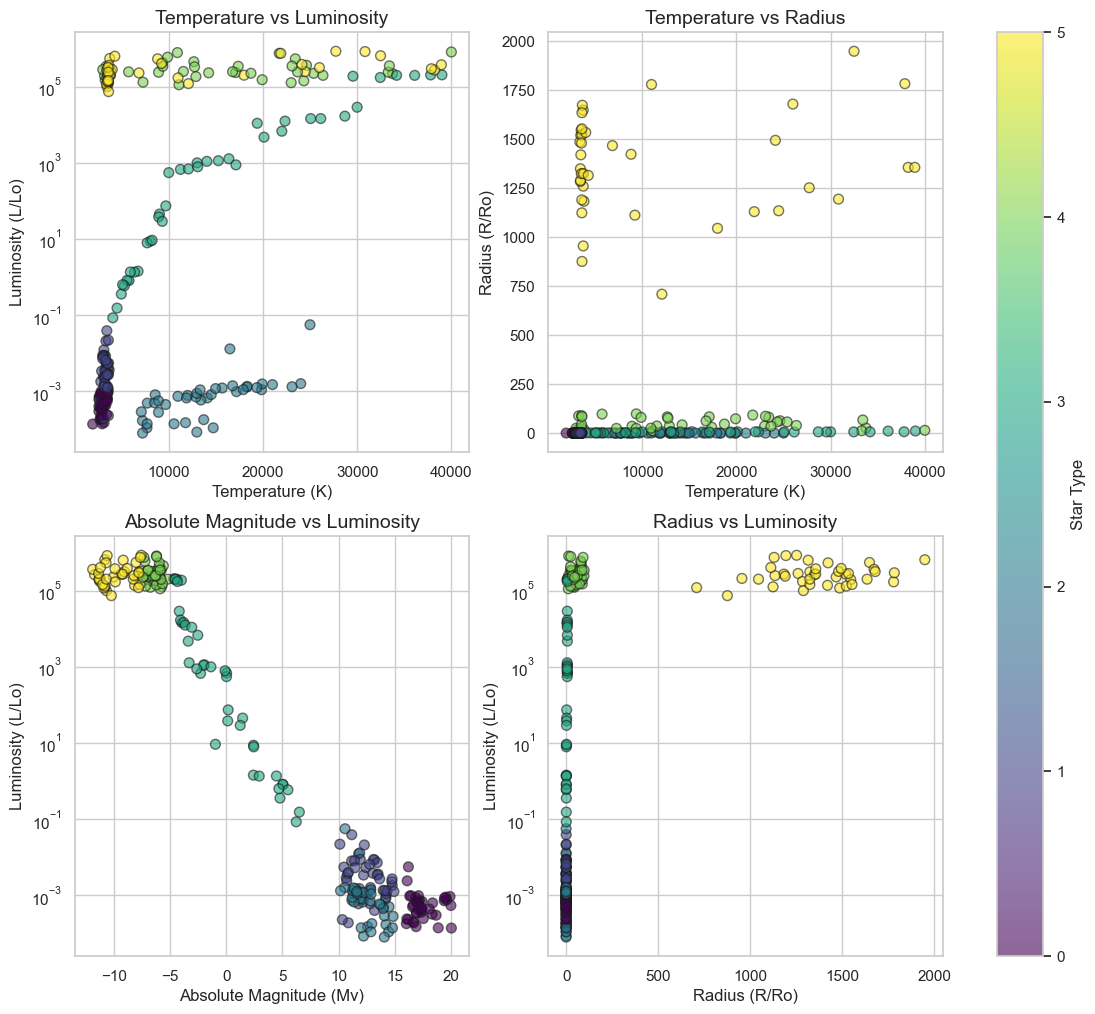

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes[0, 0].scatter(df['Temperature (K)'], df['Luminosity(L/Lo)'], 
                   c=df['Star type'], cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[0, 0].set_xlabel('Temperature (K)', fontsize=12)
axes[0, 0].set_ylabel('Luminosity (L/Lo)', fontsize=12)
axes[0, 0].set_title('Temperature vs Luminosity', fontsize=14)
axes[0, 0].set_yscale('log')
axes[0, 1].scatter(df['Temperature (K)'], df['Radius(R/Ro)'], 
                   c=df['Star type'], cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[0, 1].set_xlabel('Temperature (K)', fontsize=12)
axes[0, 1].set_ylabel('Radius (R/Ro)', fontsize=12)
axes[0, 1].set_title('Temperature vs Radius', fontsize=14)
axes[1, 0].scatter(df['Absolute magnitude(Mv)'], df['Luminosity(L/Lo)'], 
                   c=df['Star type'], cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[1, 0].set_xlabel('Absolute Magnitude (Mv)', fontsize=12)
axes[1, 0].set_ylabel('Luminosity (L/Lo)', fontsize=12)
axes[1, 0].set_title('Absolute Magnitude vs Luminosity', fontsize=14)
axes[1, 0].set_yscale('log')
scatter = axes[1, 1].scatter(df['Radius(R/Ro)'], df['Luminosity(L/Lo)'], 
                             c=df['Star type'], cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[1, 1].set_xlabel('Radius (R/Ro)', fontsize=12)
axes[1, 1].set_ylabel('Luminosity (L/Lo)', fontsize=12)
axes[1, 1].set_title('Radius vs Luminosity', fontsize=14)
axes[1, 1].set_yscale('log')

plt.colorbar(scatter, ax=axes, label='Star Type')
#plt.tight_layout()
plt.show()

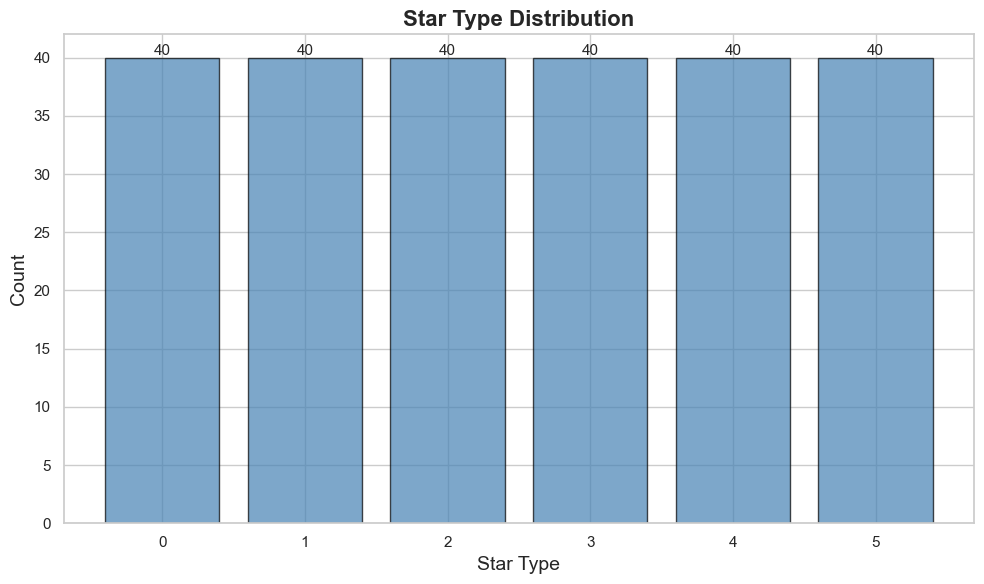

In [26]:
star_type_counts = df['Star type'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
bars = plt.bar(star_type_counts.index, star_type_counts.values, color='steelblue', edgecolor='black', alpha=0.7)
plt.title("Star Type Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Star Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(star_type_counts.index)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.show()

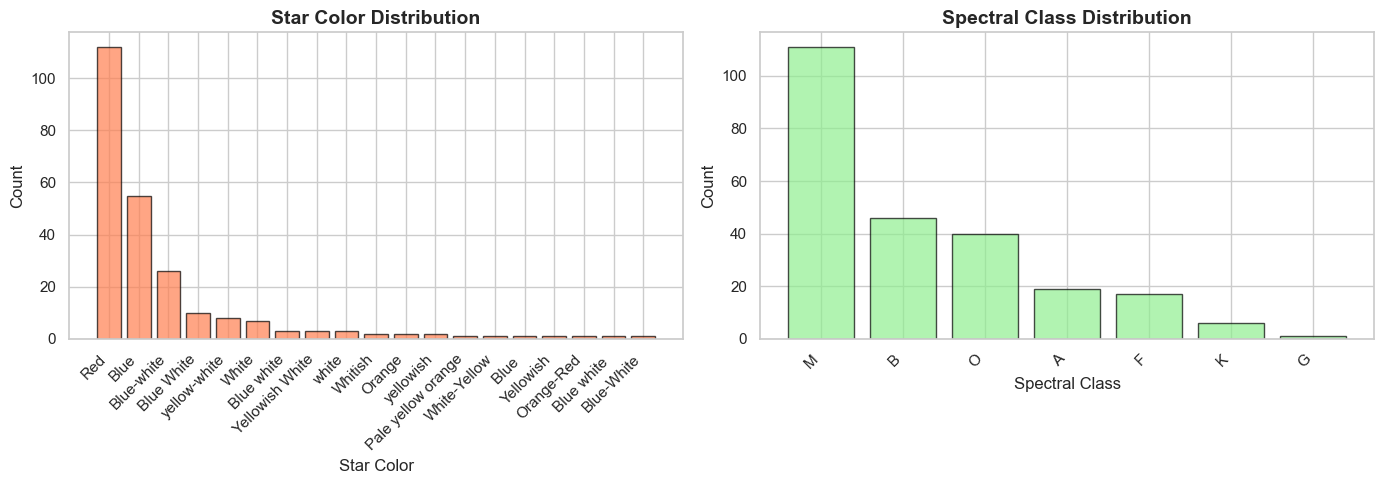

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
if 'Star color' in df.columns:
    color_counts = df['Star color'].value_counts()
    axes[0].bar(range(len(color_counts)), color_counts.values, 
                color='coral', edgecolor='black', alpha=0.7)
    axes[0].set_xticks(range(len(color_counts)))
    axes[0].set_xticklabels(color_counts.index, rotation=45, ha='right')
    axes[0].set_title('Star Color Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Star Color', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
if 'Spectral Class' in df.columns:
    spectral_counts = df['Spectral Class'].value_counts()
    axes[1].bar(range(len(spectral_counts)), spectral_counts.values, 
                color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1].set_xticks(range(len(spectral_counts)))
    axes[1].set_xticklabels(spectral_counts.index, rotation=45, ha='right')
    axes[1].set_title('Spectral Class Distribution', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Spectral Class', fontsize=12)
    axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

# NOTE!! It should be OBAFGKM

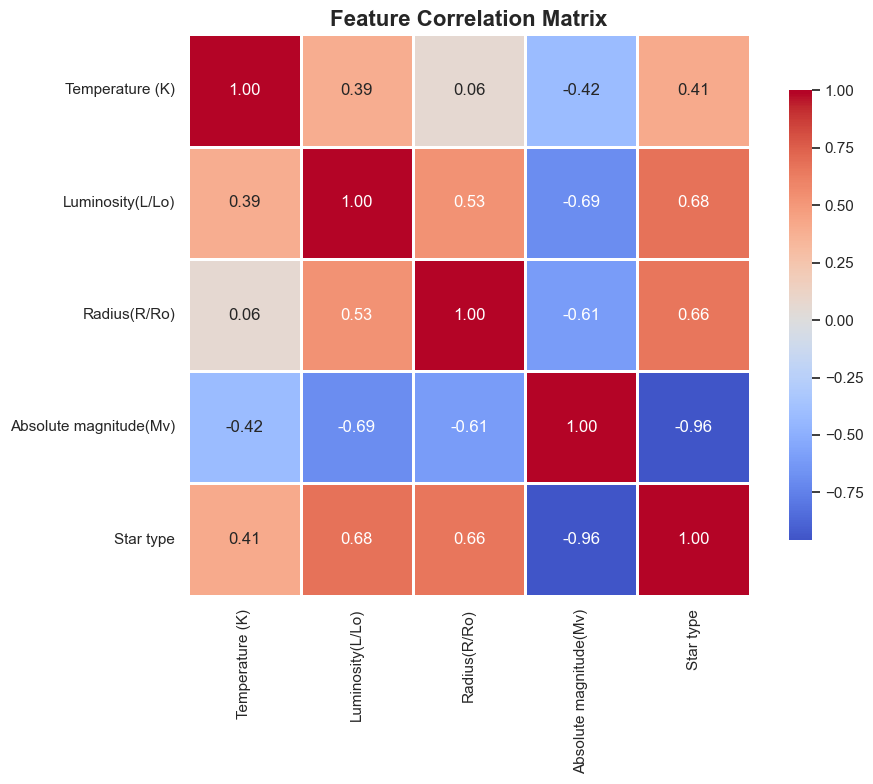

In [28]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# OPTICS Clustering

In [29]:
# have to convert the strings to numbers first
features_num = features.copy()
if 'Star color' in features_num.columns:
    star_color_mapping = {color: idx for idx, color in enumerate(features_num['Star color'].unique())}
    features_num['Star color'] = features_num['Star color'].map(star_color_mapping)

if 'Spectral Class' in features_num.columns:
    spectral_class_mapping = {s_class: idx for idx, s_class in enumerate(features_num['Spectral Class'].unique())}
    features_num['Spectral Class'] = features_num['Spectral Class'].map(spectral_class_mapping)

print("Features prepared for clustering:")
print(features_num.head())
print("Feature dtypes:")
print(features_num.dtypes)

Features prepared for clustering:
   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star color  Spectral Class  
0           0               0  
1           0               0  
2           0               0  
3           0               0  
4           0               0  
Feature dtypes:
Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star color                  int64
Spectral Class              int64
dtype: object


In [30]:
# Standardize features
# this is important for distance-based algorithms like OPTICS
# Standardization ensures each feature contributes equally to the distance calculations
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_num)
features_scaled_df = pd.DataFrame(features_scaled, columns=features_num.columns)

print("Features after standardization:")
print(features_scaled_df.describe())

Features after standardization:
       Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
count     2.400000e+02      2.400000e+02  2.400000e+02   
mean     -1.480297e-17      2.960595e-17 -1.572816e-17   
std       1.002090e+00      1.002090e+00  1.002090e+00   
min      -8.978190e-01     -5.986236e-01 -4.595230e-01   
25%      -7.504023e-01     -5.986236e-01 -4.593402e-01   
50%      -4.953014e-01     -5.986232e-01 -4.580618e-01   
75%       4.781574e-01      5.074424e-01 -3.767029e-01   
max       3.094941e+00      4.145201e+00  3.316058e+00   

       Absolute magnitude(Mv)    Star color  Spectral Class  
count            2.400000e+02  2.400000e+02    2.400000e+02  
mean            -3.885781e-17  4.440892e-17    3.700743e-17  
std              1.002090e+00  1.002090e+00    1.002090e+00  
min             -1.551051e+00 -8.689276e-01   -8.416128e-01  
25%             -1.009928e+00 -8.689276e-01   -8.416128e-01  
50%              3.739676e-01 -6.158419e-01   -2.313799e-01  
75%        

In [31]:
optics_model = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.07)
cluster_labels = optics_model.fit_predict(features_scaled)

n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"Cluster distribution:")
unique, counts = np.unique(cluster_labels, return_counts=True)
for label, count in zip(unique, counts):
    if label == -1:
        print(f"  Noise: {count} points")
    else:
        print(f"  Cluster {label}: {count} points")

Number of clusters found: 6
Number of noise points: 65
Cluster distribution:
  Noise: 65 points
  Cluster 0: 40 points
  Cluster 1: 17 points
  Cluster 2: 34 points
  Cluster 3: 31 points
  Cluster 4: 31 points
  Cluster 5: 22 points


In [32]:
non_noise_mask = cluster_labels != -1

# Silhouette score (higher is better, range: -1 to 1)
# Measures how similar points are to their own cluster vs other clusters
silhouette = silhouette_score(features_scaled[non_noise_mask], 
                                cluster_labels[non_noise_mask])
print(f"Silhouette score: {silhouette:.4f}")
print(f"Score: {'good' if silhouette > 0.5 else 'meh' if silhouette > 0.25 else 'bad'}")

# Davies-Bouldin index (lower is better)
# Measures average similarity between clusters
davies_bouldin = davies_bouldin_score(features_scaled[non_noise_mask], 
                                        cluster_labels[non_noise_mask])
print(f"Davies-Bouldin index: {davies_bouldin:.4f}")
print(f"Score: {'good' if davies_bouldin < 1.0 else 'meh' if davies_bouldin < 2.0 else 'bad'}")

# Calinski-Harabasz index (higher is better)
# Ratio of between-cluster to within-cluster variance
calinski = calinski_harabasz_score(features_scaled[non_noise_mask], 
                                    cluster_labels[non_noise_mask])
print(f"Calinski-Harabasz score: {calinski:.4f}")

Silhouette score: 0.5492
Score: good
Davies-Bouldin index: 0.7835
Score: good
Calinski-Harabasz score: 196.4529


In [33]:
# This is evaluating OPTICS
# Adjusted Rand Index (higher is better, range: -1 to 1)
# Measures similarity between true and predicted clusters
ari = adjusted_rand_score(labels, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Score: {'insane' if ari > 0.75 else 'good' if ari > 0.5 else 'meh' if ari > 0.25 else 'bad'}")

# Normalized Mutual Information (higher is better, range: 0 to 1)
# Measures information shared between true and predicted clusters
nmi = normalized_mutual_info_score(labels, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"Score: {'insane' if nmi > 0.75 else 'good' if nmi > 0.5 else 'meh' if nmi > 0.25 else 'bad'}")
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(labels, cluster_labels)
print(f"homogeneity: {homogeneity:.4f}") # Each cluster contains only members of a single class
print(f"Completeness: {completeness:.4f}") # All members of a given class are in the same cluster
print(f"V-Measure: {v_measure:.4f}") # "Harmonic mean of homogeneity and completeness" idk what that means
avg_score = (ari + nmi + v_measure) / 3
print(f"Overall average score: {avg_score:.4f} which is {'great' if avg_score > 0.7 else 'meh' if avg_score > 0.4 else 'bad'}")

Adjusted Rand Index (ARI): 0.5663
Score: good
Normalized Mutual Information (NMI): 0.7242
Score: good
homogeneity: 0.7389
Completeness: 0.7101
V-Measure: 0.7242
Overall average score: 0.6716 which is meh


# Visualizing OPTICS Results

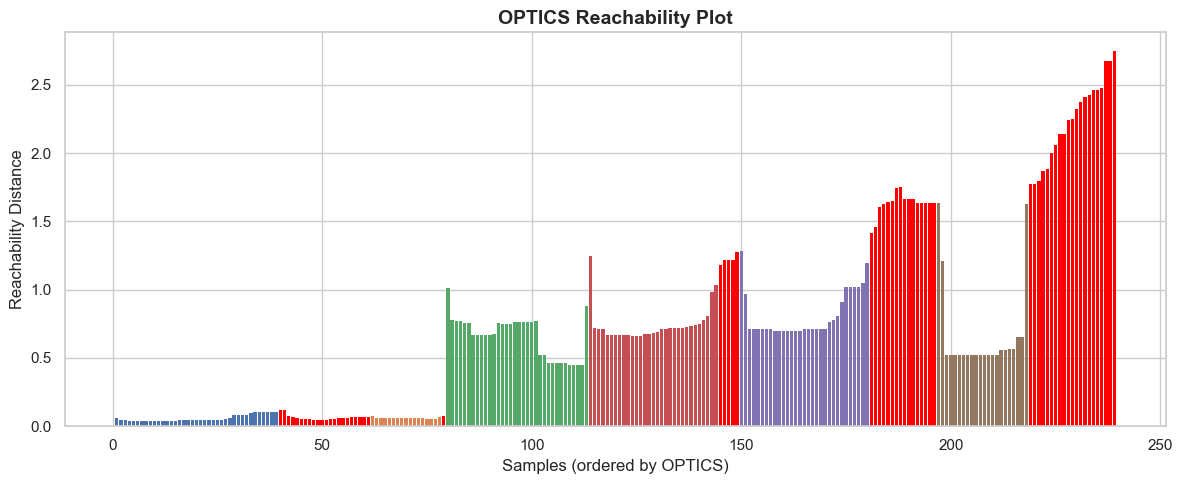

In [34]:
# Reachability plot
plt.figure(figsize=(12, 5))
space = np.arange(len(features_scaled))
reachability = optics_model.reachability_[optics_model.ordering_]
labels_ordered = cluster_labels[optics_model.ordering_]

# Color by cluster
colors = ['C{}'.format(i) for i in labels_ordered]
colors = ['red' if l == -1 else colors[i] for i, l in enumerate(labels_ordered)]

plt.bar(space, reachability, color=colors, edgecolor='none')
plt.xlabel('Samples (ordered by OPTICS)', fontsize=12)
plt.ylabel('Reachability Distance', fontsize=12)
plt.title('OPTICS Reachability Plot', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# how to interpret reachability plot
# valleys = clusters
# peaks = cluster boundaries / noise
# red bars = noise points

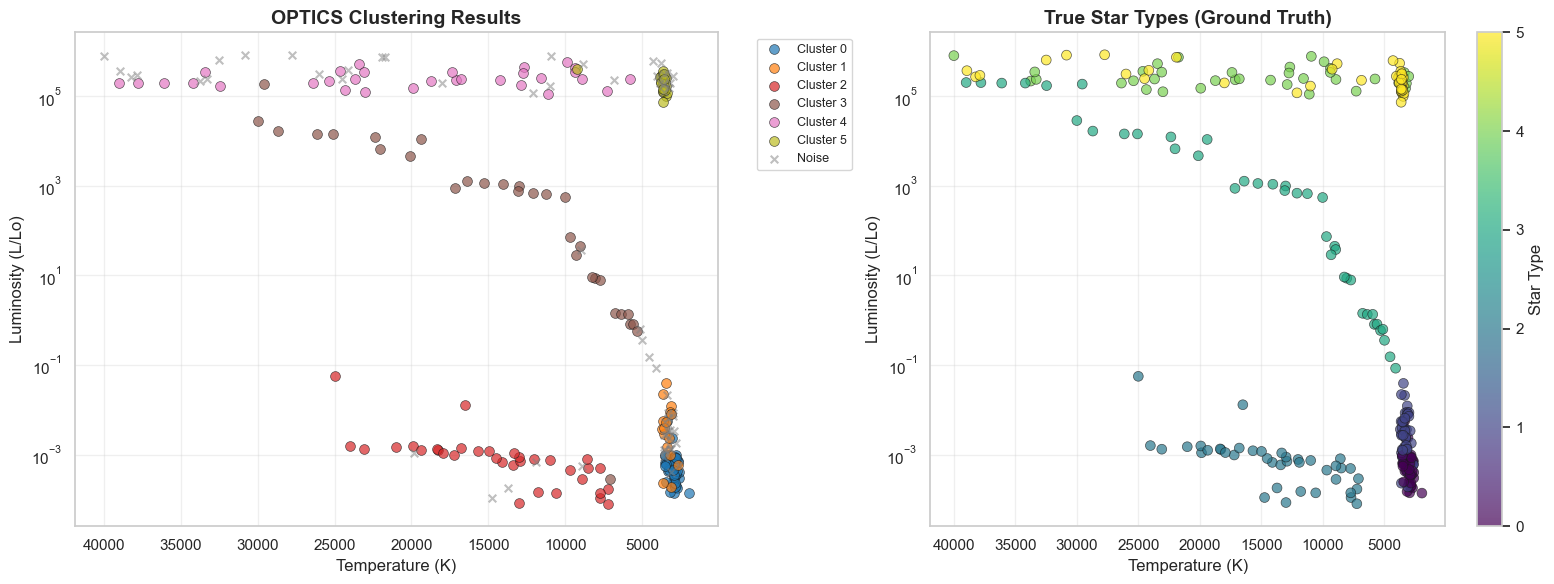

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# OPTICS clusters
unique_labels = set(cluster_labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for k in unique_labels:
    class_member_mask = (cluster_labels == k)
    xy = df[class_member_mask]
    
    if k == -1:
        # Noise points
        axes[0].scatter(xy['Temperature (K)'], xy['Luminosity(L/Lo)'], 
                       s=30, color='gray', marker='x', alpha=0.5, label='Noise')
    else:
        axes[0].scatter(xy['Temperature (K)'], xy['Luminosity(L/Lo)'], 
                       s=50, color=colors(k), label=f'Cluster {k}', 
                       edgecolors='k', alpha=0.7, linewidth=0.5)

axes[0].set_xlabel('Temperature (K)', fontsize=12)
axes[0].set_ylabel('Luminosity (L/Lo)', fontsize=12)
axes[0].set_title('OPTICS Clustering Results', fontsize=14, fontweight='bold')
axes[0].set_yscale('log')
axes[0].invert_xaxis()
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[0].grid(alpha=0.3)

scatter = axes[1].scatter(df['Temperature (K)'], df['Luminosity(L/Lo)'], 
                         c=labels, cmap='viridis', s=50, 
                         edgecolors='k', alpha=0.7, linewidth=0.5)
axes[1].set_xlabel('Temperature (K)', fontsize=12)
axes[1].set_ylabel('Luminosity (L/Lo)', fontsize=12)
axes[1].set_title('True Star Types (Ground Truth)', fontsize=14, fontweight='bold')
axes[1].set_yscale('log')
axes[1].invert_xaxis()
plt.colorbar(scatter, ax=axes[1], label='Star Type')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [36]:
comparison_df = pd.DataFrame({
    'Label': labels,
    'Cluster': cluster_labels
})

crosstab = pd.crosstab(comparison_df['Label'], comparison_df['Cluster'], 
                       rownames=['True Star Type'], colnames=['OPTICS Cluster'])
print(crosstab)
# NOTE: -1 represents noise points identified by OPTICS

OPTICS Cluster  -1   0   1   2   3   4   5
True Star Type                            
0                0  40   0   0   0   0   0
1               23   0  17   0   0   0   0
2                5   0   0  34   1   0   0
3                5   0   0   0  30   5   0
4               14   0   0   0   0  26   0
5               18   0   0   0   0   0  22
